<a href="https://colab.research.google.com/github/Jhonson924/berkeley/blob/main/FraudPrevention_ML%26AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#1. Data Understanding

## 1.1 Cards Data

In [5]:
cardsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/cards_data.csv')

In [6]:
cardsData.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [7]:
cardsData.tail()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No
6145,3199,1110,Visa,Credit,4994011318343994,12/2020,120,YES,1,$14400,05/2017,2017,No


In [8]:
cardsData.shape

(6146, 13)

In [9]:
cardsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [10]:
cardsData.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


### 1.1.1 Data Observarions

- card_number and id are unique identifiers.

- card_brand and card_type are categorical features with a few distinct values.

- credit_limit is stored as a string (e.g., $24295) and will need conversion for numeric analysis.

- card_on_dark_web has only one value (No) — likely not useful for predictive modeling unless there's variation elsewhere.

- Columns like expires, acct_open_date, and year_pin_last_changed are time-based features that can be transformed further.




## 1.2 mcc_codes

In [11]:
mccCodes = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/mcc_codes.csv')

In [12]:
mccCodes.head()

,mcc_code,merchant_category
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [13]:
mccCodes.tail()

,mcc_code,merchant_category
104,7549,Towing Services
105,5941,Sporting Goods Stores
106,5722,Household Appliance Stores
107,3009,Fabricated Structural Metal Products
108,5733,Music Stores - Musical Instruments


In [14]:
mccCodes.shape

(109, 2)

In [15]:
mccCodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mcc_code           109 non-null    int64 
 1   merchant_category  109 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [16]:
mccCodes.describe()

,mcc_code
count,109.000000
mean,5311.165138
std,1747.760406
min,1711.000000
25%,3684.000000
50%,5310.000000
75%,5977.000000
max,9402.000000


### 1.2.1 Data Observations

- The MCC (Merchant Category Code) mapping examples like:

    5812: Eating Places and Restaurants

    5541: Service Stations

    7996: Amusement Parks, Carnivals, Circuses

- This mapping can be used to enrich transaction data by decoding MCC codes into readable categories.

In [17]:
## 1.3 users Data

In [18]:
userData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/users_data.csv')

In [19]:
userData.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [20]:
userData.tail()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1
1999,1110,21,60,1998,11,Female,472 Ocean View Street,42.86,-71.48,$32325,$65909,$181261,673,2


In [21]:
userData.shape

(2000, 14)

In [22]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [23]:
userData.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


### 1.3.1 Data Observations

- Rows and Columns: The dataset contains 2,000 records and 14 columns.

- No Missing Values across any columns.

- Gender Distribution:

        Female: 1,016 users

        Male: 984 users (nearly balanced)

- Uniqueness:

        id is unique per user.

        address is nearly unique (1999 unique values out of 2000).

- Age:

        current_age ranges from 18 to 97 (80 unique values).

        retirement_age shows planning across a wide range (29 unique values).

- Financial Fields:

        per_capita_income, yearly_income, and total_debt contain a high degree of variance and should be analyzed further (converted to numeric).

- Credit Information:

        credit_score spans 321 distinct values – good for regression or segmentation.

        num_credit_cards varies from 0 to 8, indicating different credit utilization behaviors.

## 1.4 Transactions Data

In [24]:
#transactionsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/transactionData.csv')
transactionsData = pd.read_csv('/content/drive/MyDrive/Capstone Project/data/transactions_data.csv')

In [25]:
transactionsData.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [26]:
transactionsData.tail()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN
13305914,23761874,2019-10-31 23:59:00,489,5697,$12.88,Chip Transaction,24658,Greenbrier,TN,37073.0,5921,NaN


In [27]:
transactionsData.shape

(13305915, 12)

In [28]:
transactionsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [29]:
transactionsData.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


### 1.4.1 Data Observations

Dataset contains transaction-level information with the following columns:

- id: Transaction ID
- date: Timestamp of the transaction
- client_id, card_id: Identifiers for the user and card
- amount: Transaction amount (some with parentheses indicating negative values)
- use_chip: Method of card use (e.g., swipe)
- merchant_id, merchant_city, merchant_state, zip, mcc: Merchant details
- errors: Possibly fraud or error indicators

**Observation1:**
- Detailed transaction records including amounts, timestamps, and merchant details
- Covers transactions throughout the 2010s
- Features transaction types, amounts, and merchant information
- Perfect for analyzing spending patterns and building fraud detection models

In [ ]:
json_file = 'data.json'

# Try loading as a list of records (common structure for transaction datasets)
try:
    df = pd.read_json(json_file, lines=True)  # Use lines=True for JSON Lines format
except ValueError:
    df = pd.read_json(json_file)  # Fallback for regular JSON array

# Step 3: Preview the data
display(df.head())

#2. Exploratory Data Analysis @Transaction Data

## 2.1 Check for Missing Values

In [30]:
transactionsData.isnull().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,1563700
zip,1652706


## 2.2 Analyze Transaction Amounts

## 2.3 Use Chip Distribution

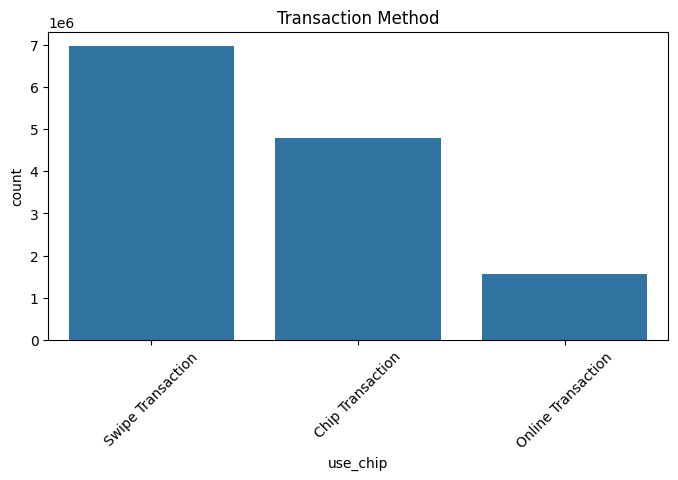

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(data=transactionsData, x='use_chip', order=transactionsData['use_chip'].value_counts().index)
plt.title('Transaction Method')
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transMethod.png')
plt.show()

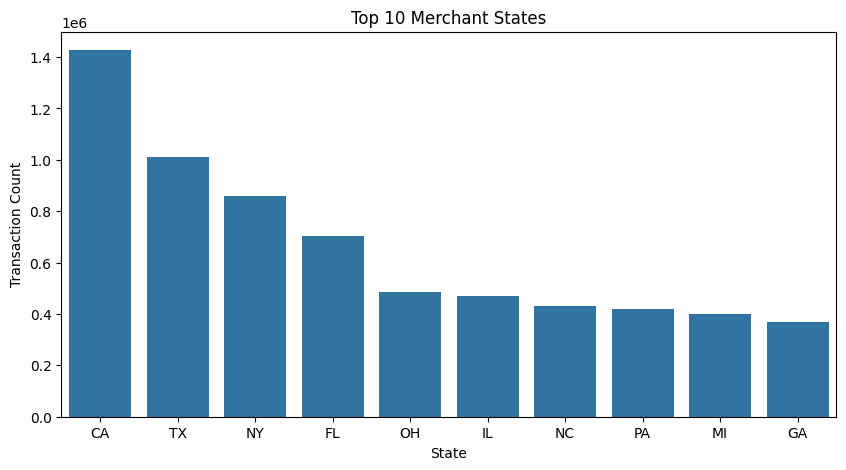

In [32]:
top_states = transactionsData['merchant_state'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Merchant States')
plt.ylabel('Transaction Count')
plt.xlabel('State')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transCount.png')
plt.show()

## Distribution of Merchant IDs

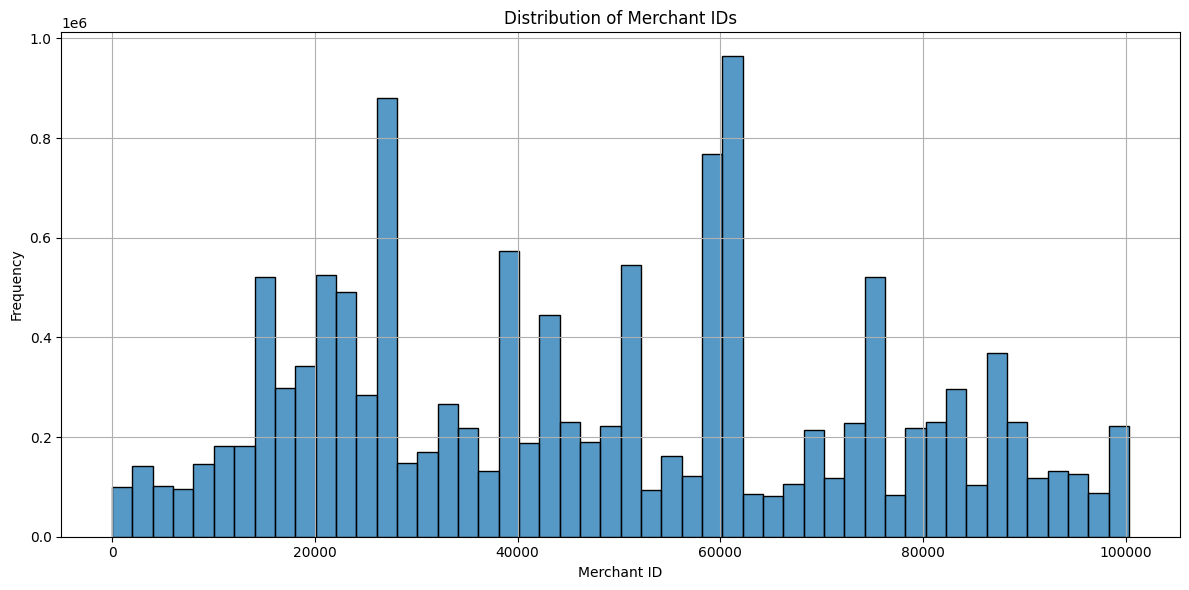

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(transactionsData['merchant_id'], bins=50, kde=False)
plt.title('Distribution of Merchant IDs')
plt.xlabel('Merchant ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Merchant Count

In [ ]:
# Compute merchant transaction counts
merchant_counts = transactionsData['merchant_id'].value_counts().reset_index()
merchant_counts.columns = ['merchant_id', 'transaction_count']
merchant_counts = merchant_counts.sort_values('transaction_count', ascending=False)
merchant_counts.head(10)

## Top 20 Merchant counts

In [ ]:
top_merchants = merchant_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='merchant_id', y='transaction_count', data=top_merchants)
plt.title('Top 20 Merchants by Transaction Count')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transMerchant.png')
plt.show()

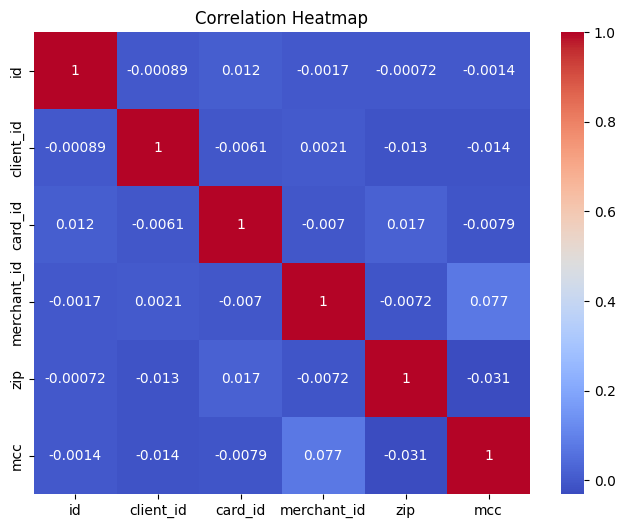

In [33]:
numeric_df = transactionsData.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/heatmap.png')
plt.show()

| Feature Pair          | Correlation | Observation                                                                               |
| --------------------- | ----------- | ----------------------------------------------------------------------------------------- |
| `mcc` & `merchant_id` | **0.077**   | Highest correlation in the matrix, though still weak. Possibly similar merchant types.    |
| `amount` & `hour`     | **0.054**   | Slight tendency for amount to vary with hour—could relate to spending patterns.           |
| `mcc` & `amount`      | **−0.034**  | Minor negative correlation—some merchant categories may have lower/higher average spends. |
| `mcc` & `hour`        | **0.031**   | Possibly some merchant categories operate more at specific times.                         |
| `zip` & `card_id`     | **0.017**   | Very weak correlation; some spatial relevance to card issuance or usage.                  |


**No Strong Correlations:**

- All values are close to 0, indicating little to no linear relationship between variables.

**Feature Independence:**

- Variables such as amount, mcc, hour, and merchant_id are largely independent, which may provide diverse signals in predictive modeling.

# Pairplot to visualize relationships between amount, use_chip, and merchant_state


In [36]:
transactionsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


## 3. Data Preparation

#3.1 Clean the 'amount' column


In [41]:
transactionsData['amount'] = transactionsData['amount'].replace('[\$,()]', '', regex=True).astype(float)

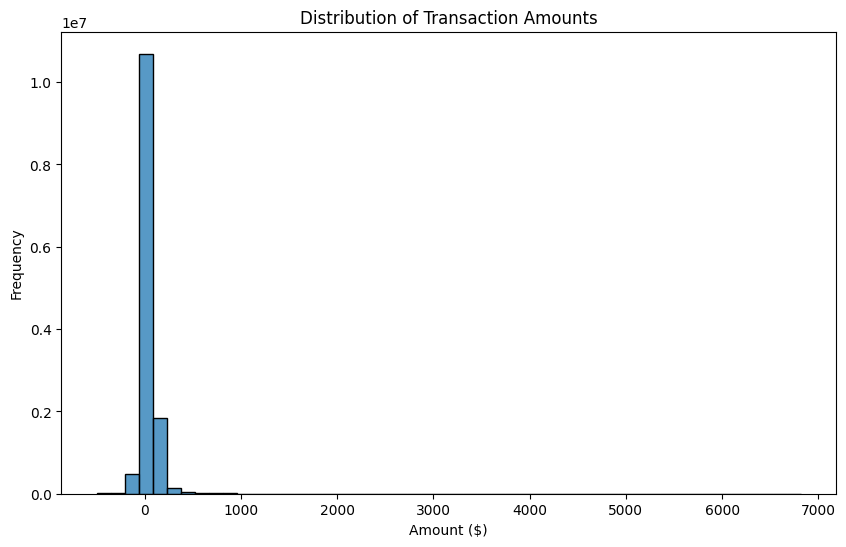

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(transactionsData['amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transAmount.png')
plt.show()

**Observations:**
Highly Skewed Distribution:

- The distribution is heavily right-skewed (positively skewed), meaning most transactions have relatively small amounts.

- A large majority of transaction amounts are concentrated near $0, forming a tall, narrow spike.

**Long Tail:**

- There's a long tail stretching toward the right, going up to amounts around $7000, but very few transactions fall in that range.

**Outliers Present:**

- The sparse bars far to the right suggest the presence of outliers or high-value transactions.

**Data Imbalance:**

- The massive spike near 0 and the flatness elsewhere indicate that most of your transactions are of small monetary value, which can pose a challenge for fraud detection models if high-value fraud is rare.

## 3.2  Convert date to datetime


In [42]:
transactionsData['date'] = pd.to_datetime(transactionsData['date'])

 ### 3.2.1 Transactions Over Time

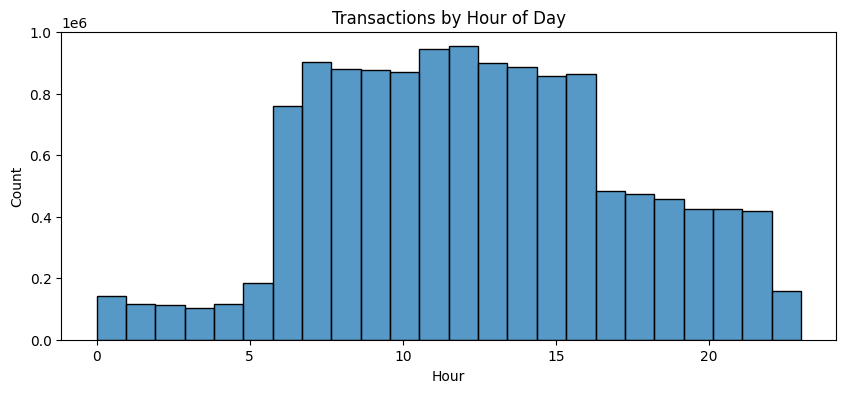

In [51]:
transactionsData['hour'] = transactionsData['date'].dt.hour
plt.figure(figsize=(10, 4))
sns.histplot(transactionsData['hour'], bins=24, kde=False)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Capstone Project/images/transHour.png')
plt.show()

**Key Observations:**

- Peak transaction hours: Transactions sharply increase starting from 6 AM and peak between 10 AM to 1 PM, with each of these hours handling close to or just above 1 million transactions.

- Low activity hours: From 12 AM to 5 AM, transaction volume remains significantly low, likely due to overnight inactivity.

- Gradual decline: After the 1 PM peak, transaction volume gradually decreases, with a noticeable drop after 4 PM.

- Late-night lows: The lowest activity is again observed post-9 PM through midnight.

**Interpretation:**
- This pattern is consistent with consumer behavior and business hours—most financial activities occur during regular daytime hours when businesses are open and customers are active.

- Early morning and late evening dips suggest limited 24/7 activity in the dataset.